# French ATC elementary sectors

## Determine and plot all the different partitions of ATC elementary sectors in France above FL195

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import contextily as cx
from traffic.data import nm_airspaces
from traffic.core.airspace import Airspace
from traffic.core.projection import Mercator
from traffic.drawing import countries

In [3]:
filters = {  # to be tuned depending on you AIRAC data
    "LFBBL2AT",
    "LFBBL2BT",
    "LFBBR2AT",
    "LFBBR2BT",
    "LFEEXKHRL",
    "LFMMSTRIKE",
    "LFEEUR1",
    "LFEEKR1",
    "LFEESE1",
    "LFEEXR1",
    "LFFFEGA",
}
colors = {
    "LFBB": "tab:blue",
    "LFMM": "tab:orange",
    "LFEE": "tab:green",
    "LFRR": "tab:red",
    "LFFF": "tab:purple",
}
fl_min = 195  # UIR
fl_max = 400
fl_incr = 5

### Identify all different sectors' partitions

In [4]:
partitions = {}
fr_es = list(nm_airspaces.search("LF.*/ES"))
filter_es = [es for es in fr_es if es.name not in filters]

for fl in range(fl_min, fl_max, fl_incr):
    es_partition = set()
    for es in filter_es:
        if min([elt.lower for elt in es]) <= fl < max([elt.upper for elt in es]):
            es_partition.add(es.name)

    if es_partition not in partitions.values():
        partitions[fl] = es_partition

print(f"Number of different partitions of ATC sectors: {len(partitions)}")
print(partitions.keys())

Number of different partitions of ATC sectors: 15
dict_keys([195, 225, 245, 265, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385])


### Plot a sectors' partition on a map

In [5]:
def highest_airspace(
    sect_name, from_fl, to_fl
):  # patch to visualize in 2D oblique sectors' interfaces (DG/DO)
    asps = nm_airspaces[sect_name].above(from_fl + 1).below(to_fl - 1)
    return Airspace(asps.name, [asps.elements[-1]]) if len(asps.elements) > 1 else asps

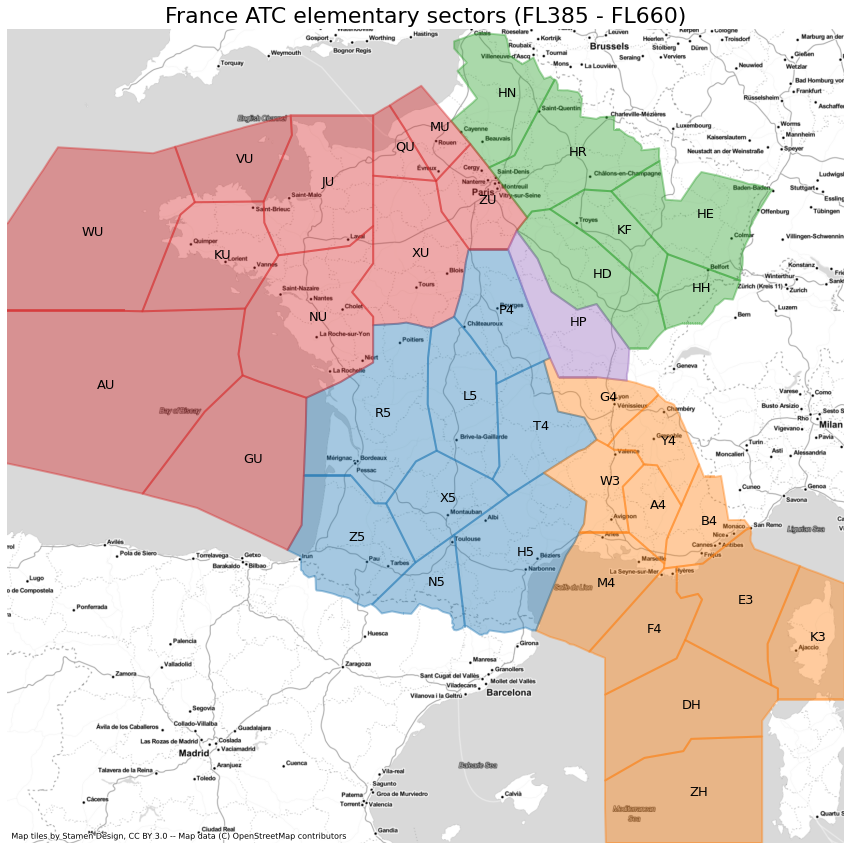

In [6]:
from_fl = 385  # included
to_fl = 660

with plt.style.context("traffic"):
    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=Mercator())
    ax.set_extent(nm_airspaces["LF"].extent)
    # ax.add_feature(countries())
    for sect in partitions[from_fl]:
        airspace = highest_airspace(sect, from_fl, to_fl)
        airspace.plot(ax, alpha=0.4, lw=2, color=colors[airspace.name[:4]])
        airspace.annotate(ax, s=airspace.name[4:])
    ax.set_title(
        "France ATC elementary sectors (FL"
        + str(from_fl)
        + " - "
        + "FL"
        + str(to_fl)
        + ")"
    )
    cx.add_basemap(
        ax,
        zoom=7,
        source=cx.providers.Stamen.TonerLite,
    )
    plt.savefig("partition.png", bbox_inches="tight")

### Plot all sectors' partitions in a single poster

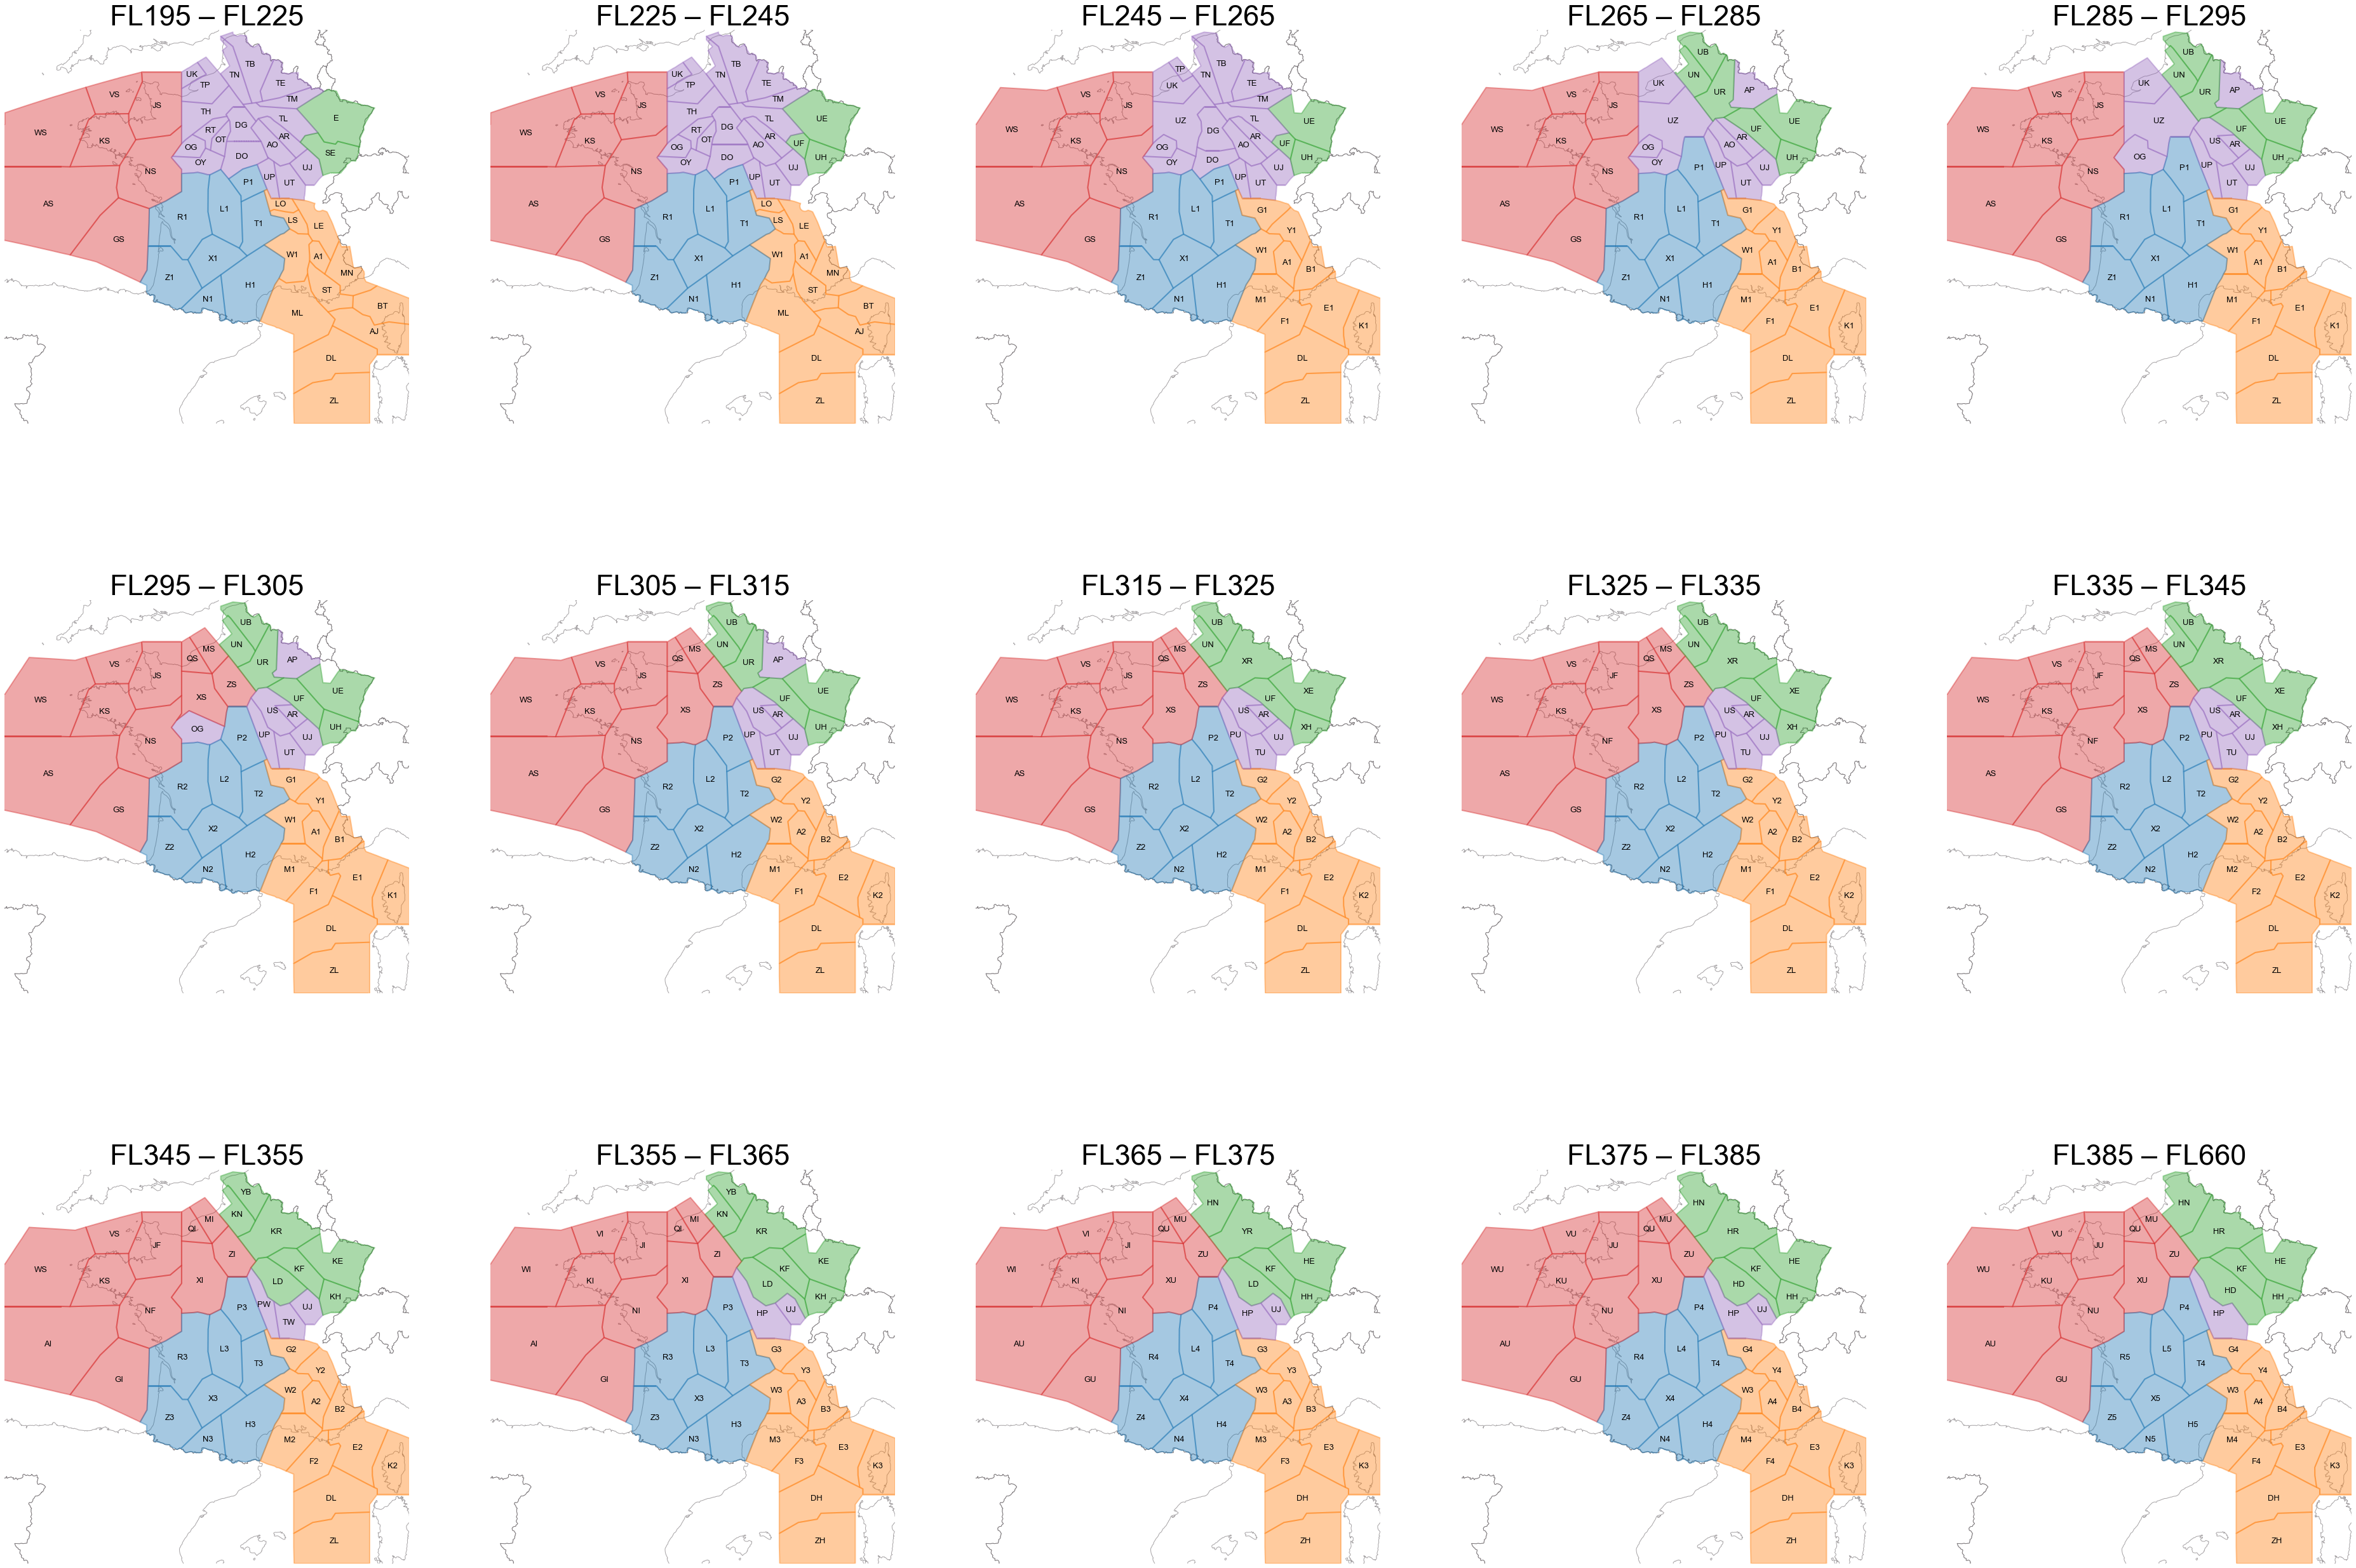

In [7]:
cm = 1 / 2.54  # centimeters in inches
myfont = "Arial"

fls = list(partitions.keys())
next_fls = fls[1:] + [660]

with plt.style.context("traffic"):
    fig, axs = plt.subplots(
        subplot_kw=dict(projection=Mercator()),
        nrows=3,
        ncols=5,
        figsize=(2 * 84.1 * cm, 2 * 59.4 * cm),  # A1 print
    )

    for ax, from_fl, to_fl in zip(axs.flat, fls, next_fls):
        ax.set_extent(nm_airspaces["LF"].extent)
        ax.add_feature(countries())

        for sect in partitions[from_fl]:
            airspace = highest_airspace(sect, from_fl, to_fl)
            airspace.plot(
                ax,
                alpha=0.4,
                lw=2,
                color=colors[airspace.name[:4]],
            )
            airspace.annotate(
                ax,
                s=airspace.name[4:],
                ha="center",
                va="center",
                fontFamily=myfont,
            )
        ax.set_title(
            "FL" + str(from_fl) + " ‒ " + "FL" + str(to_fl),
            fontSize=45,
            fontFamily=myfont,
        )
    plt.savefig("all_partitions.png", bbox_inches="tight")
    plt.savefig("french_atc_sectors.pdf", dpi=300, bbox_inches="tight")
    plt.show()